In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df=pd.read_csv('/content/Absenteeism_at_work.csv',sep=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


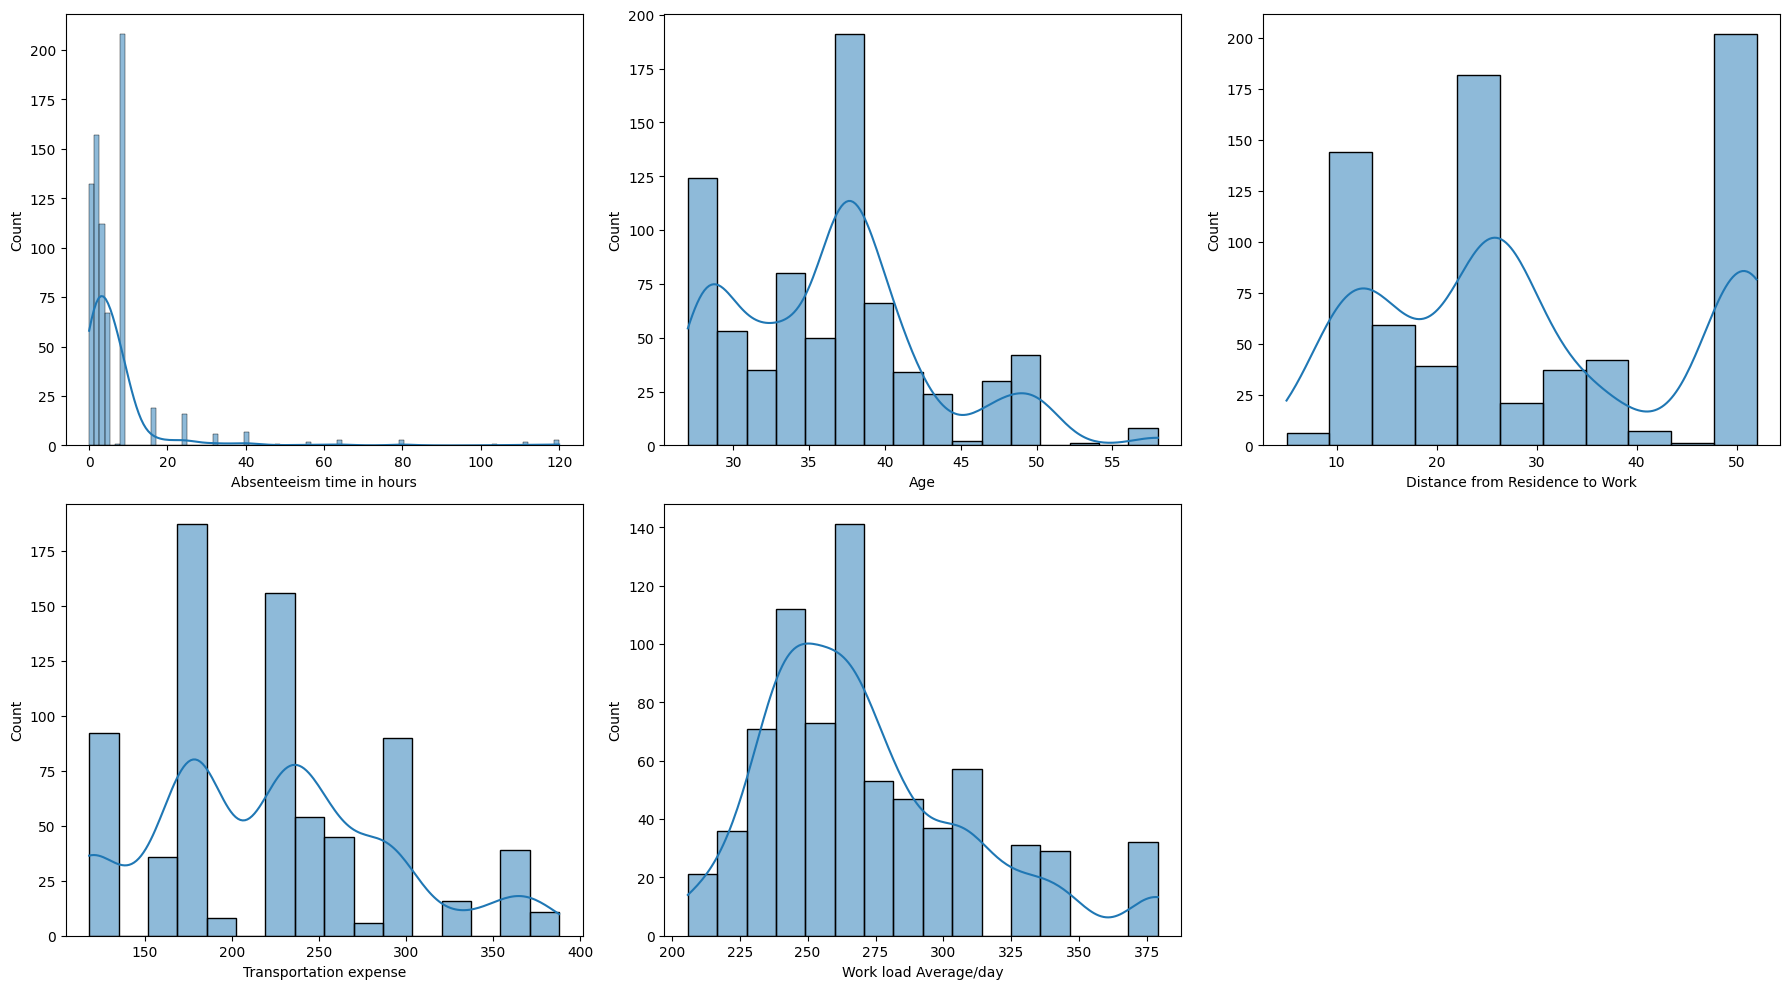

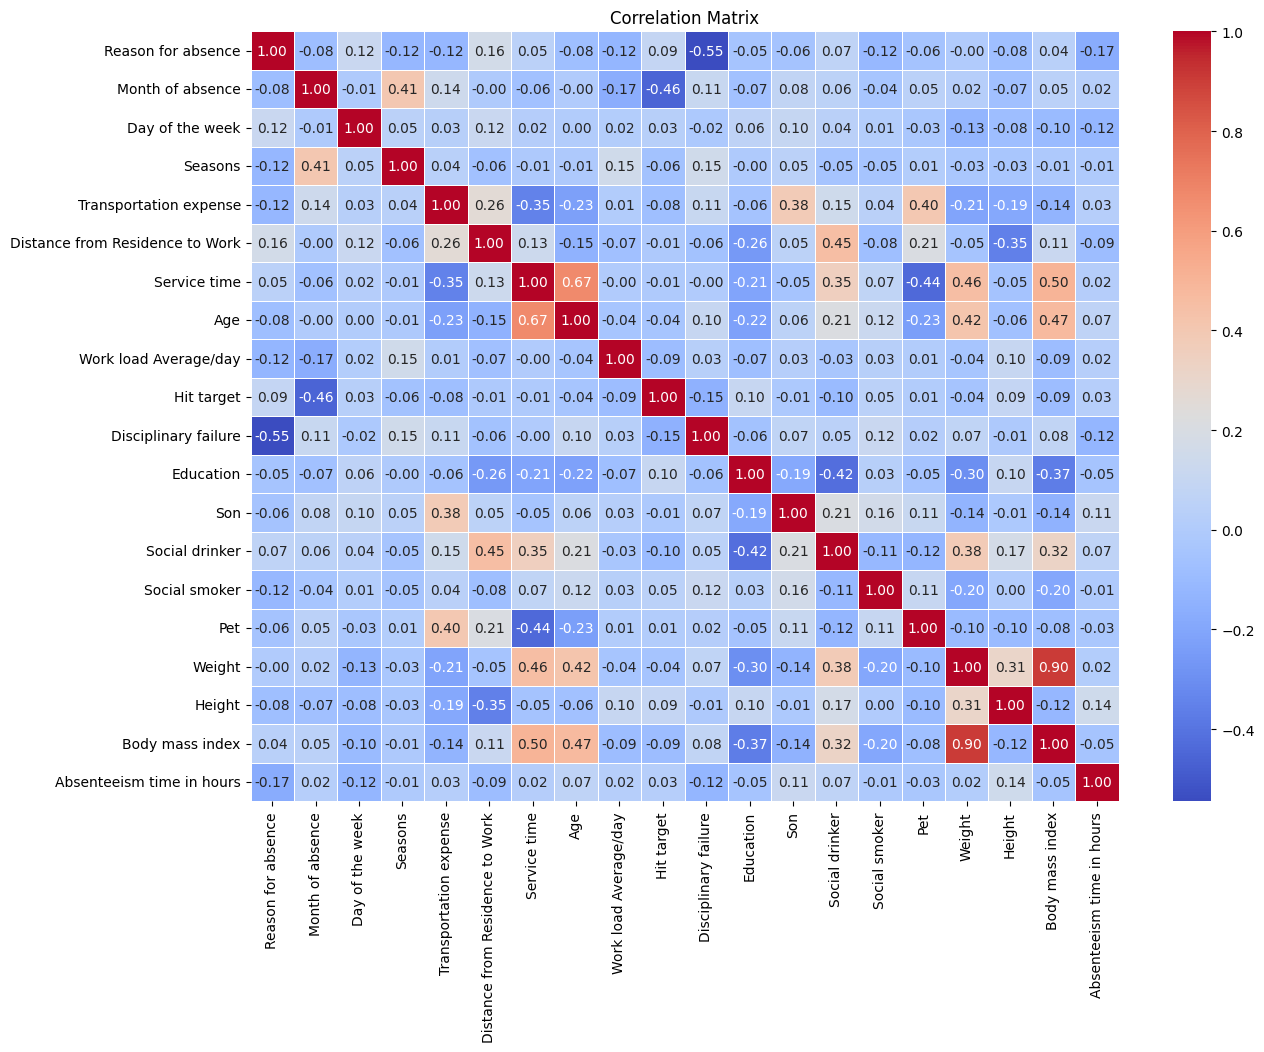

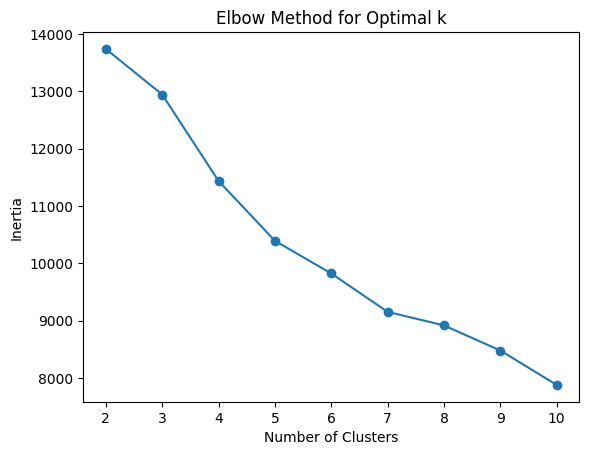

K-Means Silhouette Score: 0.19932760095084492


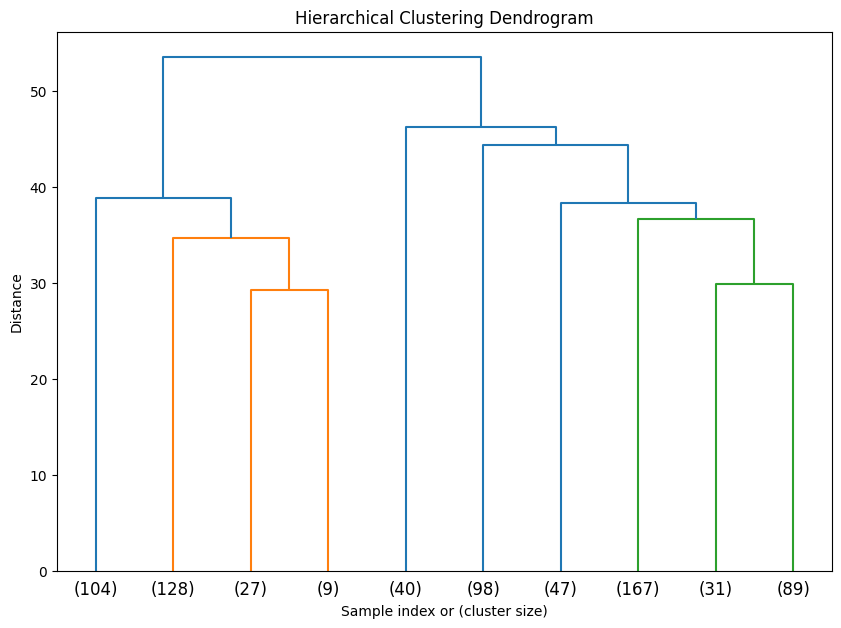

Agglomerative Clustering Silhouette Score: 0.12471456692731588
K-Means vs Agglomerative Silhouette Scores:
K-Means: 0.19932760095084492, Agglomerative: 0.12471456692731588


In [ ]:
# Strip whitespace from columns
df.columns = df.columns.str.strip()

# 1. Data Cleaning and EDA
# Drop irrelevant columns
df = df.drop(['ID'], axis=1)

# Plot distributions for some key variables
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(df['Absenteeism time in hours'], kde=True, ax=axs[0, 0])
sns.histplot(df['Age'], kde=True, ax=axs[0, 1])
sns.histplot(df['Distance from Residence to Work'], kde=True, ax=axs[0, 2])
sns.histplot(df['Transportation expense'], kde=True, ax=axs[1, 0])
sns.histplot(df['Work load Average/day'], kde=True, ax=axs[1, 1])
axs[1, 2].axis('off')
plt.tight_layout()
plt.show()

# 2. Correlation Matrix for Feature Selection
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# 3. Data Preparation: Scaling Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# 4. Model 1: K-Means Clustering with Hyperparameter Tuning
# Determine optimal k using the elbow method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit K-Means with optimal k (let’s assume k=3 based on elbow plot)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_features)
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)

# 5. Model 2: Hierarchical Clustering (Agglomerative)
# Perform linkage for dendrogram
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()

# Fit Agglomerative Clustering with optimal clusters (e.g., 3)
# Fit Agglomerative Clustering with optimal clusters (e.g., 3)
# Remove 'affinity' parameter when linkage is 'ward'
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(scaled_features)
agglo_silhouette = silhouette_score(scaled_features, agglo_labels)
print("Agglomerative Clustering Silhouette Score:", agglo_silhouette)

# 6. Compare Models
print("K-Means vs Agglomerative Silhouette Scores:")
print(f"K-Means: {kmeans_silhouette}, Agglomerative: {agglo_silhouette}")


# Inference
I applied K-Means and Agglomerative Clustering to segment workers based on absenteeism data, aiming to identify distinct patterns. Key tasks included:

Data Cleaning & Standardization: Prepared the dataset by handling irrelevant columns and standardizing numerical features to ensure consistent scaling for clustering.
Exploratory Data Analysis (EDA): Investigated feature distributions and correlations to inform feature selection, enhancing model performance.
Clustering Models:
K-Means: Using the elbow method, we selected 3 clusters, achieving a silhouette score of 0.1993, indicating good cluster cohesion.
Agglomerative Clustering: Also tested with 3 clusters, but with a lower silhouette score of 0.1247, showing less distinct clusters than K-Means.
Conclusion: K-Means outperformed Agglomerative Clustering, forming more cohesive clusters. This model offers valuable segmentation insights for understanding absenteeism patterns.






